In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from argparse import Namespace
from logging import warning
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [10]:
# CONFIGURATION

# manual

dataset = 'Cifar10'
num_display_graphs = 1000


# automatic

layer_dirs = [dir for dir in glob(f'plot_data/outdegrees/{dataset}/*') if osp.isdir(dir) and dir.split('/')[-1][:5] == 'layer']
num_layers = len(layer_dirs)


layer 0, seed 0: left, right
layer 0, seed 1: left, right
layer 0, seed 2: left, right
layer 0, seed 3: left, right
layer 0, seed 4: left, right
layer 1, seed 0: left, right
layer 1, seed 1: left

KeyboardInterrupt: 

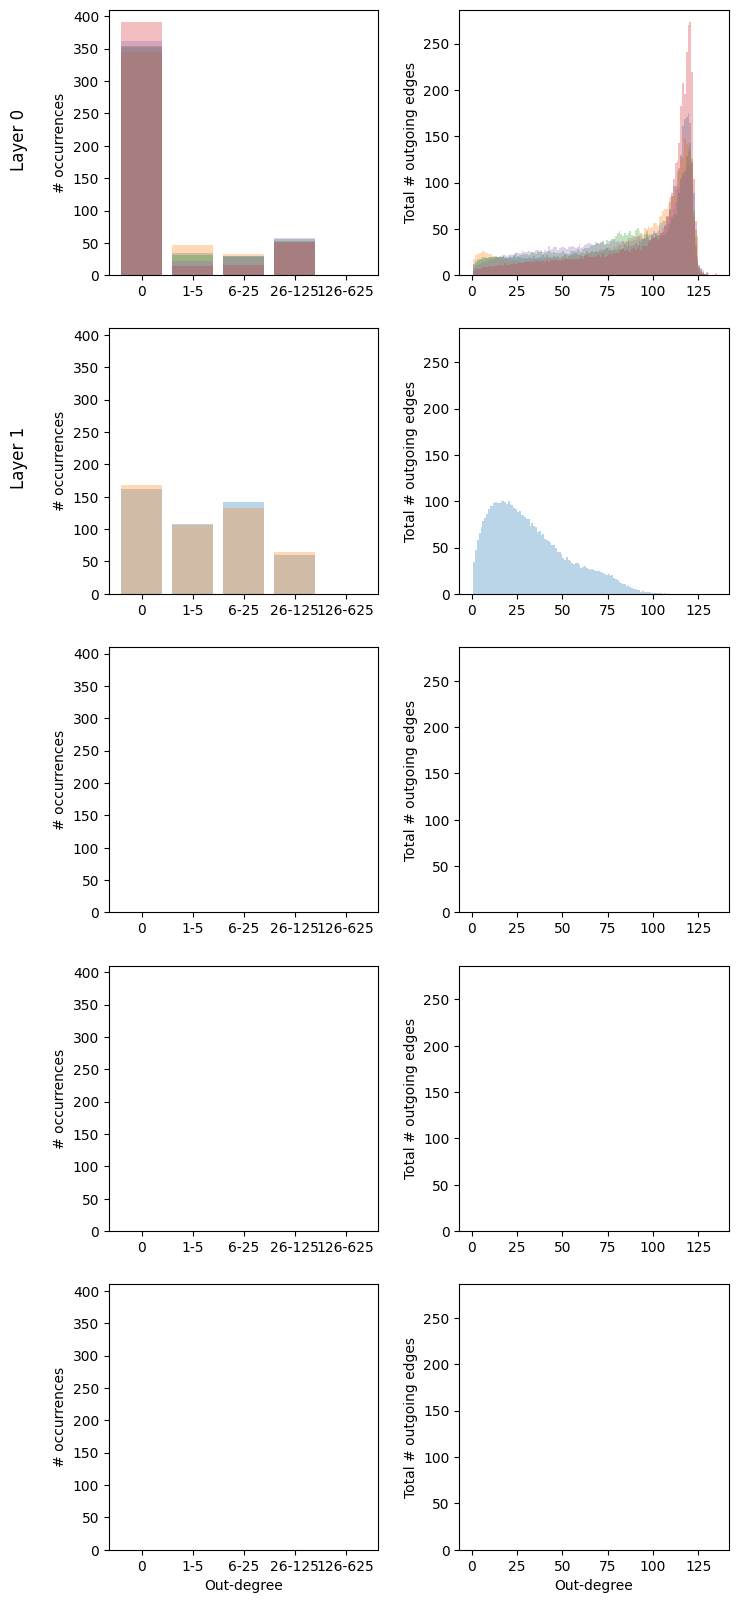

In [11]:
# prepare figure for plotting out degree statistics
fig_od, axs_od = plt.subplots(5, 2, figsize=(8,20), sharey='col', sharex='col')
plt.subplots_adjust(hspace=0.2, wspace=0.3)
axs_od[-1,0].set_xlabel("Out-degree")
axs_od[-1,1].set_xlabel("Out-degree")
for row in range(5):
    # axs[row,0].set_xlabel("Out-degree")
    axs_od[row,0].set_ylabel("# occurrences")
    axs_od[row,0].xaxis.set_tick_params(labelbottom=True)

    # axs[row,1].set_xlabel("Out-degree")
    axs_od[row,1].set_ylabel("Total # outgoing edges")
    axs_od[row,1].xaxis.set_tick_params(labelbottom=True)

for layer_num in range(num_layers):
    for seed in range(5):
        print(f"layer {layer_num}, seed {seed}: ", end="")

        occurrences_counts = torch.load(f'plot_data/outdegrees/{dataset}/layer{layer_num}/{seed}.pt')

        bar0 = (occurrences_counts==0).count_nonzero() / num_display_graphs
        bar1_5 = torch.logical_and(1 <= occurrences_counts, occurrences_counts <= 5).count_nonzero() / num_display_graphs
        bar6_25 = torch.logical_and(6 <= occurrences_counts, occurrences_counts <= 25).count_nonzero() / num_display_graphs
        bar26_125 = torch.logical_and(26 <= occurrences_counts, occurrences_counts <= 125).count_nonzero() / num_display_graphs
        bar126_ = (126 <= occurrences_counts).count_nonzero() / num_display_graphs

        # Plotting the histogram
        bars = ['0', '1-5', '6-25', '26-125', '126-625']
        heights = [bar0, bar1_5, bar6_25, bar26_125, bar126_]

        axs_od[layer_num,0].bar(bars, heights, alpha=0.3)

        print("left", end="")

        axs_od[layer_num,1].hist(occurrences_counts, bins=torch.arange(0, max(occurrences_counts)+1), weights=occurrences_counts / num_display_graphs, alpha=0.3)
        axs_od[layer_num,0].set_title(f"Layer {layer_num}", rotation=90, x=-0.3, y=0.48, va='center', ha='right')

        print(", right")